## Preliminary analysis

This notebook analyzes the MTA subway data for the week of June 10-17, 2017 that can be found here:

http://web.mta.info/developers/turnstile.html

1.Download that SAME file and read it in below. View the first few rows.

In [3]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

     |████████████████████████████████| 993kB 1.7MB/s 


In [11]:
#insert 1
import pandas as pd

link = '1GjAawjLocSh1g6RZ63kx505x-0BsqFPo'
downloaded = drive.CreateFile({'id':link}).GetContentFile('june17.txt')
df = pd.read_csv('june17.txt')
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/10/2017,00:00:00,REGULAR,6215258,2104297
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/10/2017,04:00:00,REGULAR,6215284,2104303
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/10/2017,08:00:00,REGULAR,6215318,2104337
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/10/2017,12:00:00,REGULAR,6215475,2104417
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/10/2017,16:00:00,REGULAR,6215841,2104465


2.What are the column names?

In [0]:
#insert 2
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

3.We can see that there is a lot of whitespace at the end of the exits column name. Let's strip that whitespace:

In [44]:
#insert 3
df.columns = df.columns.str.strip()
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

4.How big is the data set?

In [0]:
#insert 4
df.shape

(197209, 11)

5.How many unique stations are there? What are they? Answer each of these questions in one line each.

In [0]:
#insert 5
print(len(set(df['STATION'])))
print(set(df['STATION']))

376
{'KINGSTON AV', '30 AV', 'EXCHANGE PLACE', '42 ST-PORT AUTH', '145 ST', 'COURT SQ-23 ST', 'STERLING ST', 'CENTRAL AV', 'CLASSON AV', 'NEWARK HW BMEBE', 'TREMONT AV', '55 ST', '59 ST COLUMBUS', '2 AV', '169 ST', 'PELHAM PKWY', 'BEVERLEY ROAD', '88 ST', 'AVENUE J', 'LONGWOOD AV', '96 ST-2 AVE', 'QUEENSBORO PLZ', '34 ST-HUDSON YD', '137 ST CITY COL', 'JAMAICA CENTER', 'PARK PLACE', 'RIT-MANHATTAN', 'NEW LOTS AV', 'CHAMBERS ST', 'ASTOR PL', '63 DR-REGO PARK', 'NEPTUNE AV', 'CHRISTOPHER ST', 'GREENPOINT AV', 'PRINCE ST', '175 ST', 'JAMAICA 179 ST', 'WALL ST', '36 AV', 'BOROUGH HALL', 'CANAL ST', '215 ST', '233 ST', '8 ST-NYU', 'NEWARK BM BW', 'PARKSIDE AV', '33 ST-RAWSON ST', '82 ST-JACKSON H', 'GRD CNTRL-42 ST', '111 ST', "B'WAY-LAFAYETTE", '52 ST', 'BURNSIDE AV', '3 AV', 'OZONE PK LEFFRT', 'FRESH POND RD', 'NEWARK HM HE', 'FREEMAN ST', 'ATL AV-BARCLAY', 'SPRING ST', '14 ST-UNION SQ', 'INWOOD-207 ST', '104 ST', '9 AV', '72 ST', 'FLUSHING AV', 'CYPRESS AV', '125 ST', 'MORGAN AV', '59 ST

6.Okay, so we understand what station represents. But what the heck are C/A, UNIT, and SCP? Keep in mind that in the larger stations, you might have multiple areas within one station that look like this:

<img src="image.jpg" style="width: 300px;"/>

Further complicating things, there are a few station names like 14TH ST that refer to more than one station location along that street.

This data set is not very well documented. Welcome to the joys of real world data science!!!

Read the following two links carefully to see other people's confusion and what information they have been able to gather:

https://groups.google.com/forum/#!topic/mtadeveloperresources/AMVx2WUY9iI

https://groups.google.com/forum/#!searchin/mtadeveloperresources/%22remote$20unit%22%7Csort:relevance/mtadeveloperresources/z8l3ZU9cY6Y/OFlHGkFAimQJ

It sounds like each C/A + UNIT + SCP + STATION combo refers to a single turnstile. How many unique turnstiles are there? 

In [0]:
#insert 6
df.groupby(['STATION','UNIT', 'C/A','SCP']).count()
df['turn'] = df['STATION'] + df['UNIT'] + df['C/A'] + df['SCP']
df.head()
len(set(df.turn))

4695

7.What data types are each of the columns?

In [0]:
#insert 7
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197209 entries, 0 to 197208
Data columns (total 12 columns):
C/A         197209 non-null object
UNIT        197209 non-null object
SCP         197209 non-null object
STATION     197209 non-null object
LINENAME    197209 non-null object
DIVISION    197209 non-null object
DATE        197209 non-null object
TIME        197209 non-null object
DESC        197209 non-null object
ENTRIES     197209 non-null int64
EXITS       197209 non-null int64
turn        197209 non-null object
dtypes: int64(2), object(10)
memory usage: 18.1+ MB


8.We can see that the exits and entries are treated as integers but the others are all treated as objects (strings). Overwrite the time column so that it is a datetime object containing the combined date and time column info (so that the times have a chronological order). 

In [0]:
#insert 8
from datetime import datetime

df['TIME'] = pd.to_datetime(df['DATE']+' '+df['TIME'])
df.sort_values(by='TIME', inplace = True)
df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/10/2017,2017-06-10 00:00:00,REGULAR,6215258,2104297
14954,B020,R263,00-00-01,AVENUE H,BQ,BMT,06/10/2017,2017-06-10 00:00:00,REGULAR,1097803,278679
140792,R188,R037,00-06-01,207 ST,1,IRT,06/10/2017,2017-06-10 00:00:00,REGULAR,588569,1201367
140749,R188,R037,00-06-00,207 ST,1,IRT,06/10/2017,2017-06-10 00:00:00,REGULAR,134771850,952090
140706,R188,R037,00-00-02,207 ST,1,IRT,06/10/2017,2017-06-10 00:00:00,REGULAR,2924697,588263
14997,B020,R263,00-00-02,AVENUE H,BQ,BMT,06/10/2017,2017-06-10 00:00:00,REGULAR,2940931,1761231
140663,R188,R037,00-00-01,207 ST,1,IRT,06/10/2017,2017-06-10 00:00:00,REGULAR,9190927,1929981
140620,R188,R037,00-00-00,207 ST,1,IRT,06/10/2017,2017-06-10 00:00:00,REGULAR,8612994,1826687
140578,R186,R036,00-05-01,DYCKMAN ST,1,IRT,06/10/2017,2017-06-10 00:00:00,REGULAR,1,649
140536,R186,R036,00-05-00,DYCKMAN ST,1,IRT,06/10/2017,2017-06-10 00:00:00,REGULAR,965,0


9.What is the earliest and latest date in our dataset?

In [0]:
#insert 9
print(df['TIME'].min())
print(df['TIME'].max())

2017-06-10 00:00:00
2017-06-16 23:59:54


10.If we wanted to only look at the 34st Street Penn Station stop on 6/12/2017, what would we type?

In [46]:
#insert 10
df[(df.STATION == '34 ST-HERALD SQ') & (df.SCP == '00-05-04') & (df['C/A'] == 'N506') & (df.UNIT == 'R022')]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
93784,N506,R022,00-05-04,34 ST-HERALD SQ,BDFMNQRW,IND,06/10/2017,00:00:00,REGULAR,11897615,8045400
93785,N506,R022,00-05-04,34 ST-HERALD SQ,BDFMNQRW,IND,06/10/2017,04:00:00,REGULAR,11897615,8045461
93786,N506,R022,00-05-04,34 ST-HERALD SQ,BDFMNQRW,IND,06/10/2017,08:00:00,REGULAR,11897615,8045571
93787,N506,R022,00-05-04,34 ST-HERALD SQ,BDFMNQRW,IND,06/10/2017,12:00:00,REGULAR,11897615,8046301
93788,N506,R022,00-05-04,34 ST-HERALD SQ,BDFMNQRW,IND,06/10/2017,16:00:00,REGULAR,11897615,8047549
93789,N506,R022,00-05-04,34 ST-HERALD SQ,BDFMNQRW,IND,06/10/2017,20:00:00,REGULAR,11897615,8048900
93790,N506,R022,00-05-04,34 ST-HERALD SQ,BDFMNQRW,IND,06/11/2017,00:00:00,RECOVR AUD,11897615,8049572
93791,N506,R022,00-05-04,34 ST-HERALD SQ,BDFMNQRW,IND,06/11/2017,04:00:00,RECOVR AUD,11897615,8049655
93792,N506,R022,00-05-04,34 ST-HERALD SQ,BDFMNQRW,IND,06/11/2017,08:00:00,RECOVR AUD,11897615,8049730
93793,N506,R022,00-05-04,34 ST-HERALD SQ,BDFMNQRW,IND,06/11/2017,12:00:00,REGULAR,1258286595,2046861608


11.Create a dictionary called bigDict. It should contain a nested set of keys and values. The outermost key should be the tuple (C/A,UNIT,STATION) and its value should itself be a dictionary with the SCP as the key and a list of (TIME, EXITS) tuples as its values. The purpose of this section is to prepare data for later uses. It should take a little while to finish running.

In [0]:
#insert 11
bigDict, smallDict = {}, {}
for i in range(len(df.index)):
  smallDict[(df.loc[i, 'C/A'], df.loc[i, 'UNIT'], df.loc[i, 'STATION'], df.loc[i, 'SCP'])] = smallDict.get((df.loc[i, 'C/A'], df.loc[i, 'UNIT'], df.loc[i, 'STATION'], df.loc[i, 'SCP']), []) + [(df.loc[i, 'TIME'], df.loc[i, 'EXITS'])]

for i in range(len(df.index)):
  try:
    try:
      bigDict[(df.loc[i, 'C/A'], df.loc[i, 'UNIT'], df.loc[i, 'STATION'])]
    except:
      bigDict[(df.loc[i, 'C/A'], df.loc[i, 'UNIT'], df.loc[i, 'STATION'])] = {}
    bigDict[(df.loc[i, 'C/A'], df.loc[i, 'UNIT'], df.loc[i, 'STATION'])].update({df.loc[i, 'SCP']: smallDict[(df.loc[i, 'C/A'], df.loc[i, 'UNIT'], df.loc[i, 'STATION'], df.loc[i, 'SCP'])]})
  except:
    pass
  #bigDict[(df.loc[i, 'C/A'], df.loc[i, 'UNIT'], df.loc[i, 'STATION'])] = bigDict.get({df.loc[i, 'SCP']: (df.loc[i, 'TIME'], df.loc[i, 'EXITS'])}, {}) + {df.loc[i, 'SCP']: (df.loc[i, 'TIME'], df.loc[i, 'EXITS'])}

In [0]:
print(len(bigDict))

732


12.As an example, use the bigDict to view all of the turnstile data located at the('A037', 'R170', '14 ST-UNION SQ') area:

In [0]:
#insert 12
len(bigDict[('A037', 'R170', '14 ST-UNION SQ')])
#df[(df.STATION == '14 ST-UNION SQ') & (df.UNIT == 'R170') & (df['C/A'] == 'A037') & (df.SCP == '05-00-00')]

4

13.Create a function called inspection that takes in the (C/A,UNIT,STATION) tuple and SCP value and plots the exit counter data versus time. 

For example, the input of 
```python
inspection(('A037', 'R170', '14 ST-UNION SQ'), '05-00-00')
```
should produce an upward trending plot.

True

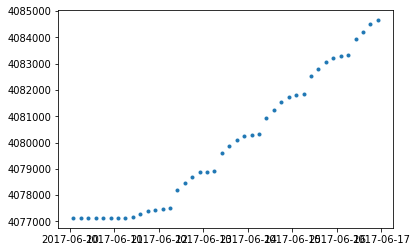

In [0]:
#insert 13
def inspection(tup, scp):
  import matplotlib.pyplot as plt
  import matplotlib.dates as mdates
  import numpy as np
  a, b = zip(*bigDict[tup][scp])
  plt.plot(a, b, '.')
  a = mdates.date2num(a)
  if np.polyfit(a, b, 1)[0] > 0:
    return True
  else:
    return False
  
inspection(('R204', 'R043', 'WALL ST'), "02-00-00")

## Finding Data Errors
14.Due to bugs in MTA data, we will need to remove "incorrect" data. First, find the incorrect data by figuring out which turnstile counters aren't going strictly upwards. How many of these incorrect data values are there? Create a smaller dictionary callled "trouble" that contains the troublesome data from the bigDict.

161

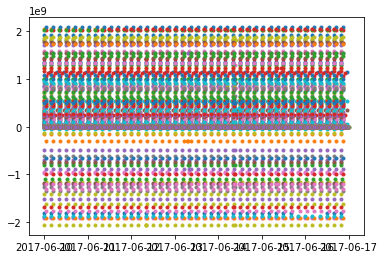

In [0]:
#insert 14
trouble = {}
for key in bigDict:
  for scp in bigDict[key]:
    if inspection(key, scp) == False:
      trouble[key] = trouble.get(key, []) + [scp]
      
len(trouble)

15.Using the troublesome dictionary and your inspection plotting function, plot all of the troublesome data. There are several different types of errors. What do you think is causing each type?

In [0]:
#insert 15
for tup, s in trouble.items():
  for scp in s:
    inspection(tup, scp)

NameError: ignored

## Data Cleanup
There are three types of mistakes: decreasing, garbage values, and turnstile resets.

#### Mistake Type I: Monotone but Decreasing - To fix this, we reflect the data. 

16.Run the cell below to fix it:

Total Monotone Decrease: 295
Problem Fixed!
Total Monotone Decrease: 263


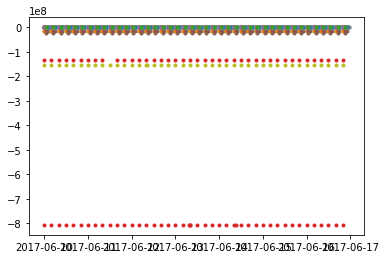

In [0]:
def isMonotoneDecrease(tup):
    '''Input: Tuple of (Station etc,SCP). 
    Output: True if this SCP has monotone property, but decreasing, False otherwise.'''
    n = len(bigDict[tup[0]][tup[-1]])
    for i in range(n-1):
        if(bigDict[tup[0]][tup[-1]][i+1][1]>bigDict[tup[0]][tup[-1]][i][1]):
            return False
    return True

def fixMonotoneDecrease(tup):
    '''reflects the data to fix it'''
    n = len(bigDict[tup[0]][tup[1]])
    for i in range(n):
        bigDict[tup[0]][tup[1]][i] = (bigDict[tup[0]][tup[1]][i][0],(-1)*bigDict[tup[0]][tup[1]][i][1])
    

monotoneDecreaseList = []
for j in trouble:
  for scp in trouble[j]:
    k = (j, scp)
    if(isMonotoneDecrease(k)):
        monotoneDecreaseList.append(k)
print("Total Monotone Decrease:",len(monotoneDecreaseList))
for k in monotoneDecreaseList:
    fixMonotoneDecrease(k)
print("Problem Fixed!")

monotoneDecreaseList = []
for j in trouble:
  for scp in trouble[j]:
    k = (j, scp)
    if(isMonotoneDecrease(k)):
        monotoneDecreaseList.append(k)
print("Total Monotone Decrease:",len(monotoneDecreaseList))
for k in monotoneDecreaseList:
    inspection(k[0], k[1])

#### Mistake Type II: Garbage Value - To fix this, remove the garbage value

17.Run the cell below to fix it:

Garbage Removed: 3


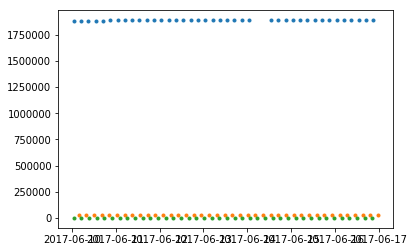

In [0]:
def garbageEliminator(tup):
    '''removes nonsensical isolated points'''
    n = len(bigDict[tup[0]][tup[1]])
    toDel = []
    for i in range(1,n-1):
        if((bigDict[tup[0]][tup[1]][i-1][1]>bigDict[tup[0]][tup[1]][i+1][1])):
            continue
        if((bigDict[tup[0]][tup[1]][i-1][1]<=bigDict[tup[0]][tup[1]][i][1]) and (bigDict[tup[0]][tup[1]][i][1]<=bigDict[tup[0]][tup[1]][i+1][1])):
            continue
        toDel.append(bigDict[tup[0]][tup[1]][i])
    #Deletion Process
    if(len(toDel)==0):
        return 0
    for k in toDel:
        bigDict[tup[0]][tup[1]].remove(k)
    return 1


#Driver
cnt = 0
healList = []
for j in trouble:
  for scp in trouble[j]:
    k = (j, scp)
    if(garbageEliminator(k)):
        healList.append(k)
print("Garbage Removed:",len(healList))
for k in healList:
    inspection(k[0], k[1])

#### Mistake Type III: Turnstile Reset - To fix this, shift the data upwards.

18.Run the cell below to fix it:

Cleaned


True

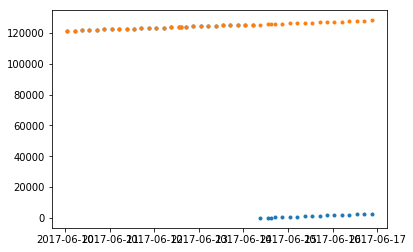

In [0]:
def dealingWithReset(tup):
    '''for counters that are reset, we fix the data by shifting it upwards'''
    sta = tup[0]
    tsl = tup[1]
    n = len(bigDict[sta][tsl])
    #Detecting Part
    resetPoint = [] # it means (i,i+1) is reset
    resetSet = []
    for i in range(1,n-2):
        if(bigDict[sta][tsl][i][1]<=bigDict[sta][tsl][i+1][1]):
            continue #We don't need to change this one
        resetPoint.append(i)
    #Fixing Part
    resetSet = set(resetPoint)
    cumulative = 0
    for i in range(n-2):
        if(i not in resetSet):
            bigDict[sta][tsl][i] = (bigDict[sta][tsl][i][0],bigDict[sta][tsl][i][1]+cumulative)
            continue
        #Problem
        expected = (bigDict[sta][tsl][i][1]-bigDict[sta][tsl][i-1][1])+ (bigDict[sta][tsl][i+2][1]-bigDict[sta][tsl][i+1][1])
        expected = int(expected/2)
        shift = (bigDict[sta][tsl][i][1]+expected)-bigDict[sta][tsl][i+1][1]
        cumulative = shift
    for i in range(n-2,n):
        bigDict[sta][tsl][i] = (bigDict[sta][tsl][i][0],bigDict[sta][tsl][i][1]+cumulative)
    #Done!
    
#Test Usage
inspection(('JFK03', 'R536', 'JFK JAMAICA CT1'), '00-03-00')
dealingWithReset((('JFK03', 'R536', 'JFK JAMAICA CT1'), '00-03-00'))
print("Cleaned")
inspection(('JFK03', 'R536', 'JFK JAMAICA CT1'), '00-03-00')

## Overall Cleaning Process
19.This next cell does all of the previous cleanup in one cell. Run the cell below:

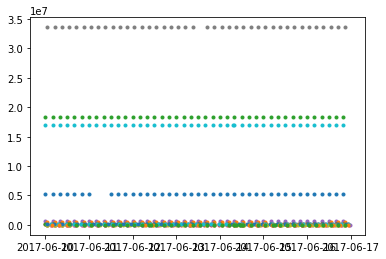

In [0]:
toClean = {}
for st,stv in bigDict.items():
    for scp,lst in stv.items():
        #Cleaning in Each LIST of turnstile
        toDel = []
        n = len(lst)
        lst.sort()
        for i in range(1,n-1):
            if(lst[i-1][1]<=lst[i][1] and lst[i][1]<=lst[i+1][1]): #What we expected Data to be (Non-Decreasing)
                continue

            key = (st,scp)
            toClean[key] = trouble.get(key,0)+1
            
for k in toClean.keys():
    if(isMonotoneDecrease(k)):
        fixMonotoneDecrease(k)
    garbageEliminator(k)
    dealingWithReset(k)
    inspection(k[0], k[1])

20.Which troublesome stations are left?

In [0]:
trouble = {}
for st,stv in bigDict.items():
    for scp,lst in stv.items():
        #Cleaning in Each LIST of turnstile
        toDel = []
        n = len(lst)
        lst.sort()
        for i in range(1,n-1):
            if(lst[i-1][1]<=lst[i][1] and lst[i][1]<=lst[i+1][1]): #What we expected Data to be (Non-Decreasing)
                continue
                
            key = (st,scp)
            trouble[key] = trouble.get(key,0)+1
print("Trouble List: ",len(trouble.keys()))
for k,v in trouble.items():
    print(k,v)

Trouble List:  2
(('PTH11', 'R545', '14TH STREET'), '00-00-03') 3
(('R240', 'R047', 'GRD CNTRL-42 ST'), '00-00-01') 1


21.Delete these two keys from bigDict manually:

In [0]:
#insert 21
bigDict[('PTH11', 'R545', '14TH STREET')].pop('00-00-03', None)
bigDict[('R240', 'R047', 'GRD CNTRL-42 ST')].pop('00-00-01', None)

[(Timestamp('2017-06-10 13:00:00'), 157972),
 (Timestamp('2017-06-10 17:00:00'), 415),
 (Timestamp('2017-06-10 21:00:00'), 919),
 (Timestamp('2017-06-11 01:00:00'), 1250),
 (Timestamp('2017-06-11 05:00:00'), 1321),
 (Timestamp('2017-06-11 09:00:00'), 1526),
 (Timestamp('2017-06-11 13:00:00'), 2166),
 (Timestamp('2017-06-11 17:00:00'), 2853),
 (Timestamp('2017-06-11 21:00:00'), 3426),
 (Timestamp('2017-06-12 01:00:00'), 3697),
 (Timestamp('2017-06-12 05:00:00'), 3753),
 (Timestamp('2017-06-12 09:00:00'), 5979),
 (Timestamp('2017-06-12 09:53:17'), 7063),
 (Timestamp('2017-06-12 13:00:00'), 8094),
 (Timestamp('2017-06-12 17:00:00'), 8818),
 (Timestamp('2017-06-12 21:00:00'), 9061),
 (Timestamp('2017-06-13 01:00:00'), 9272),
 (Timestamp('2017-06-13 05:00:00'), 9335),
 (Timestamp('2017-06-13 09:00:00'), 11740),
 (Timestamp('2017-06-13 13:00:00'), 13983),
 (Timestamp('2017-06-13 17:00:00'), 14594),
 (Timestamp('2017-06-13 21:00:00'), 14864),
 (Timestamp('2017-06-14 01:00:00'), 15131),
 (Time

22.The data is now all cleaned, so let's save it so that we don't have to run all of the above code every time. Use the pickle package to save bigDict as an "MTAdict.pkl" file.

In [0]:
#insert 22
import pickle
with open('MTAdict.pkl', 'wb') as f:
  pickle.dump(bigDict, f)

# creates a google drive file in a folder
# if you need to create a new pkl file (aka if you've changed any of the code above, 
# DELETE the one in the MTA folder first
# then run the code below
# then fine the 'id' portion of the sharing link on the NEW file and change
# it in this cell and the one below
try:
  drive.CreateFile({'id':'1U8zPs0xhBZrbQTbgXTPaNnM1iNhnBE-_'}).GetContentFile('MTAdict.pkl')
except:
  file = drive.CreateFile({'parents':[{u'id': '1Y-eG30BcWG6zbW7ISjQP5RI0S8cF-3pz'}]})
  file.SetContentFile('MTAdict.pkl')
  file.Upload() 

# --At this point, the data is ready to use and so we are ready for data analysis.--
23.Let's read the cleaned data file back in and save it as bigDict.

In [4]:
#insert 23
import pickle
drive.CreateFile({'id':'1U8zPs0xhBZrbQTbgXTPaNnM1iNhnBE-_'}).GetContentFile('MTAdict.pkl')
bigDict = pickle.load(open('MTAdict.pkl', 'rb'))
len(bigDict)

732

24.Create a function called turnstileRiders that takes in a single turnstile's date/exit info and a start and endtime (in datetime format) and returns the number of riders through that turnstile within that time period. As an extension, you may want to use a linear approximation in the case of incomplete information. 

For instance, the input 
```python
t1 = dt.strptime("2017-06-12 00:00:00","%Y-%m-%d %H:%M:%S")
t2 = dt.strptime("2017-06-13 00:00:00","%Y-%m-%d %H:%M:%S")
turnstileRiders(bigDict[('R204', 'R043', 'WALL ST')]["02-00-00"],t1,t2)
```

should output 1419 riders.

In [5]:
#insert 24
from datetime import datetime as dt
bigDict[('R204', 'R043', 'WALL ST')]["02-00-00"]
def turnstileRiders(turn, start, end):
  import matplotlib.dates as mdates
  import numpy as np
  a, b = zip(*turn)
  try:
    return b[a.index(end)] - b[a.index(start)]
  except:
    try:
      ts2 = min([x for x in a if x>=start])
    except:
      #print('start bug')
      return 0
    try:
      ts1 = max([x for x in a if x <=start])
    except:
      ts1 = ts2
      ts2 = min([x for x in a if x>ts1])
    try:
      te1 = max([x for x in a if x<=end])
    except:
      #print('end bug')
      return 0
    try:
      te2 = min([x for x in a if x >= end])
    except:
      te2 = te1
      te1 = max([x for x in a if x<te2])
    try:
      scalc = -b[a.index(start)]
    except:
      scalc = -((start - ts1)*(b[a.index(ts2)] - b[a.index(ts1)])/(ts2-ts1) + b[a.index(ts1)])
    try:
      ecalc = b[a.index(end)]
    except:
      ecalc = (((end - te1)*(b[a.index(te2)] - b[a.index(te1)]))/(te2-te1) + b[a.index(te1)])
    return scalc+ecalc

t1 = dt.strptime("2017-06-11 00:00:00","%Y-%m-%d %H:%M:%S")
t2 = dt.strptime("2017-06-12 00:00:00","%Y-%m-%d %H:%M:%S")
turnstileRiders(bigDict[('N506', 'R022', '34 ST-HERALD SQ')]["00-05-04"],t1,t2)

2038813495

25.Create a function called stationRiders that calls the turnstileRiders function for each turnstile in a  (C/A,UNIT,STATION) station area and tallies all of the riders through that area between two times.

For example, an input of 
```python
getStationRangeRider(bigDict[('R204', 'R043', 'WALL ST')],dt(2017,6,12,0,0,0),dt(2017,6,13,0,0,0))
```
should output 9507 riders.

In [6]:
#insert 25
def getStationRangeRider(stuff, start, end):
  total = 0
  for key in stuff:
    turn = stuff[key]
    if turnstileRiders(turn, start, end) <1000000:
      total += turnstileRiders(turn, start, end)
  return int(total)
  
getStationRangeRider(bigDict[('N506', 'R022', '34 ST-HERALD SQ')],dt(2017,6,11,0,0,0),dt(2017,6,12,0,0,0))

19251

26.There are still several station areas within a station. Make a plot of the day of the week versus the number of total station rider exits for the ENTIRE Wall St station.

In [7]:
#insert 26
def day(station, start, end):
  total = 0
  for key in bigDict:
    if key[2] == station:
      total += getStationRangeRider(bigDict[key], start, end)
  return total
      
day('WALL ST', dt(2017,6,12,0,0,0),dt(2017,6,13,0,0,0))



43675

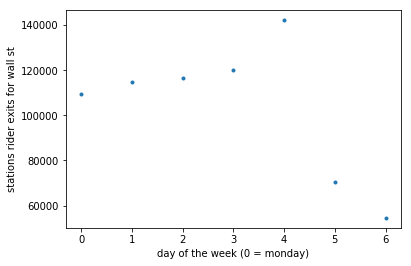

In [9]:
import matplotlib.pyplot as plt
daydict = {}

for i in range(10, 17): #change to 10, 17 after debugging
  daydict[dt(2017,6,i,0,0,0).weekday()] = day('34 ST-HERALD SQ', dt(2017,6,i,0,0,0),dt(2017,6,i+1,0,0,0))
  
a, b = daydict.keys(), daydict.values()
plt.xlabel('day of the week (0 = monday)')
plt.ylabel('stations rider exits for wall st')
plt.plot(a, b, '.');

27.Sort by busiest station areas during 6/12 midnight - 6/13 midnight in descending order by creating a list of sorted tuples:

In [0]:
#insert 27
busy_turns = []

for turn, scp in bigDict.items():
  busy_turns.append((turn, getStationRangeRider(bigDict[turn], dt(2017,6,12,0,0,0),dt(2017,6,13,0,0,0))))
  busy_turns.sort(key=lambda tup: tup[1], reverse=True)
  
busy_turns

[(('PTH22', 'R540', 'PATH NEW WTC'), 57293),
 (('R238', 'R046', 'GRD CNTRL-42 ST'), 54169),
 (('R249', 'R179', '86 ST'), 36343),
 (('R240', 'R047', 'GRD CNTRL-42 ST'), 35520),
 (('R533', 'R055', 'FLUSHING-MAIN'), 30835),
 (('H009', 'R235', 'BEDFORD AV'), 28806),
 (('N324', 'R018', 'JKSN HT-ROOSVLT'), 28039),
 (('N500', 'R020', '47-50 STS ROCK'), 27867),
 (('A025', 'R023', '34 ST-HERALD SQ'), 27437),
 (('PTH03', 'R552', 'JOURNAL SQUARE'), 27390),
 (('R138', 'R293', '34 ST-PENN STA'), 27246),
 (('N506', 'R022', '34 ST-HERALD SQ'), 26662),
 (('N049', 'R084', '59 ST COLUMBUS'), 25941),
 (('R221', 'R170', '14 ST-UNION SQ'), 25867),
 (('N507', 'R023', '34 ST-HERALD SQ'), 25506),
 (('N063A', 'R011', '42 ST-PORT AUTH'), 25330),
 (('N083', 'R138', 'W 4 ST-WASH SQ'), 24702),
 (('A034', 'R170', '14 ST-UNION SQ'), 24671),
 (('N306', 'R017', 'LEXINGTON AV/53'), 24245),
 (('R169', 'R168', '96 ST'), 23435),
 (('R258', 'R132', '125 ST'), 23227),
 (('N606', 'R025', 'JAMAICA CENTER'), 23013),
 (('R151',

28.Make a dictionary called total_dict that contains the station name as its key and the total number of riders through all of its station areas between 6/12-6/13 as its value. Then create a sorted list of tuples to view the busiest stations on that day.

In [0]:
#insert 28
total_dict = {}
busy_stat = []

for station in set(df.STATION):
  total_dict[station] = day(station, dt(2017,6,12,0,0,0), dt(2017,6,13,0,0,0))

for stat, riders in total_dict.items():
  #print(getStationRangeRider(bigDict[turnst], dt(2017,6,12,0,0,0),dt(2017,6,13,0,0,0)))
  busy_stat.append((stat, riders))
  busy_stat.sort(key=lambda tup: tup[1], reverse=True)

busy_stat

[('34 ST-PENN STA', 136836),
 ('GRD CNTRL-42 ST', 135084),
 ('34 ST-HERALD SQ', 109563),
 ('TIMES SQ-42 ST', 91048),
 ('14 ST-UNION SQ', 88412),
 ('23 ST', 85487),
 ('FULTON ST', 81123),
 ('42 ST-PORT AUTH', 72937),
 ('86 ST', 72801),
 ('47-50 STS ROCK', 62141),
 ('125 ST', 58526),
 ('PATH NEW WTC', 57293),
 ('59 ST', 57251),
 ('59 ST COLUMBUS', 55966),
 ('CANAL ST', 55868),
 ('CHAMBERS ST', 50766),
 ('96 ST', 48909),
 ('14 ST', 47859),
 ('LEXINGTON AV/53', 47196),
 ('72 ST', 46473),
 ('FLUSHING-MAIN', 46095),
 ('WALL ST', 43675),
 ('28 ST', 42841),
 ('42 ST-BRYANT PK', 40872),
 ('ATL AV-BARCLAY', 39204),
 ('50 ST', 38847),
 ('JKSN HT-ROOSVLT', 37885),
 ('W 4 ST-WASH SQ', 36078),
 ('7 AV', 35480),
 ('JAMAICA CENTER', 33735),
 ('145 ST', 30358),
 ('BOWLING GREEN', 29966),
 ('77 ST', 29233),
 ('BEDFORD AV', 28806),
 ('5 AV/53 ST', 28602),
 ('KEW GARDENS', 27568),
 ('JOURNAL SQUARE', 27390),
 ('LEXINGTON AV/63', 27153),
 ("B'WAY-LAFAYETTE", 27067),
 ('CHURCH AV', 27059),
 ('8 AV', 26272),

29.Make a histogram of those station totals:

No handles with labels found to put in legend.


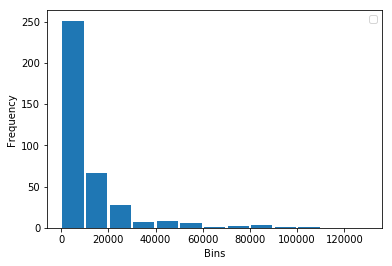

In [0]:
#insert 29
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


plt.hist(total_dict.values(), rwidth=.9, bins=np.arange(0,140000,10000))
plt.xlabel('Bins', size=10)
plt.ylabel('Frequency', size=10)
plt.xticks(np.arange(0,140000,20000))
plt.legend()
plt.show()

30.Create a commuter index to be the average weekday exits divided by the sum of the avg weekday exits + avg weekend exits. To do this, first make a function called isWeekday that returns True if the datetime input is a weekday and False if it isn't.

In [12]:
#insert 30
def isWeekday(day1):
  if day1.weekday() < 5:
    return True
  return False

day_exits = 0 
end_exits = 0

for station in set(df.STATION):
   for i in range(10, 17):
      if isWeekday(dt(2017,6,i,0,0,0)):
        day_exits += day(station, dt(2017,6,i,0,0,0), dt(2017,6,i+1,0,0,0))
      else:
        end_exits += day(station, dt(2017,6,i,0,0,0), dt(2017,6,i+1,0,0,0))

day_exits = day_exits/5
end_exits = end_exits/2

com_index = day_exits/(day_exits+end_exits)
print(com_index)

0.648571881826491


31.Make a function called commuterIndex that inputs a (C/A,UNIT,STATION) tuple and outputs its commuter index. 

For example, the output of 
```python
getCommuteIndex(('PTH11', 'R545', '14TH STREET'))
```
should be 0.663.

In [13]:
#insert 31
def getCommuteIndex(stuff):
  day_exits = 0 
  end_exits = 0

  for i in range(10, 17):
    if isWeekday(dt(2017,6,i,0,0,0)):
       day_exits += getStationRangeRider(bigDict[stuff], dt(2017,6,i,0,0,0), dt(2017,6,i+1,0,0,0))
    else:
       end_exits += getStationRangeRider(bigDict[stuff], dt(2017,6,i,0,0,0), dt(2017,6,i+1,0,0,0))

  day_exits = day_exits/5
  end_exits = end_exits/2

  try:
    com_index = day_exits/(day_exits+end_exits)
  except:
     return 0
  return com_index

getCommuteIndex(('PTH11', 'R545', '14TH STREET'))

0.663527536274669

32.Create a sorted list of tuples in descending order containing the commuter index and the station area tuple.

In [15]:
def average_num_riders(station):
  wday, wend = 0, 0
  for i in range(10,17):
    if isWeekday(dt(2017,6,i,0,0,0)):
      wday += getStationRangeRider(bigDict[station], dt(2017,6,i,0,0,0), dt(2017,6,i+1,0,0,0))
    else:
      wend += getStationRangeRider(bigDict[station], dt(2017,6,i,0,0,0), dt(2017,6,i+1,0,0,0))
      
  return (wday/5, wend/2)

average_num_riders(('PTH11', 'R545', '14TH STREET'))

(8990.4, 4559.0)

In [16]:
#insert 32
tup_com = []

for turn, scp in bigDict.items():
  tup_com.append((turn, getCommuteIndex(turn), (getCommuteIndex(turn)*average_num_riders(turn)[0], (1-getCommuteIndex(turn))*average_num_riders(turn)[1])))

tup_com.sort(key=lambda tup: tup[2][0], reverse=True)
tup_com

[(('R238', 'R046', 'GRD CNTRL-42 ST'),
  0.7028952952646773,
  (41350.20558794854, 7387.805587948534)),
 (('PTH22', 'R540', 'PATH NEW WTC'),
  0.7504062866429408,
  (41059.980786241795, 4542.480786241798)),
 (('R240', 'R047', 'GRD CNTRL-42 ST'),
  0.766412349005181,
  (29171.0335453654, 2709.733545365398)),
 (('R249', 'R179', '86 ST'),
  0.7026625620143012,
  (28323.484679722067, 5071.684679722064)),
 (('N500', 'R020', '47-50 STS ROCK'),
  0.8132141110880061,
  (23533.765803598028, 1241.5658035980234)),
 (('N507', 'R023', '34 ST-HERALD SQ'),
  0.7310257736110859,
  (20566.386704464847, 2784.286704464844)),
 (('N306', 'R017', 'LEXINGTON AV/53'),
  0.8123976743886246,
  (20478.433137383818, 1092.033137383816)),
 (('A025', 'R023', '34 ST-HERALD SQ'),
  0.6668379335469741,
  (20078.6235466861, 5011.9235466860955)),
 (('N501', 'R020', '47-50 STS ROCK'),
  0.8232386942922808,
  (19609.54569804213, 904.0456980421299)),
 (('R138', 'R293', '34 ST-PENN STA'),
  0.6498108558301106,
  (18986.95335

In [27]:
tup_com.sort(key=lambda tup: tup[2][1], reverse=True)
tup_com

[(('N506', 'R022', '34 ST-HERALD SQ'),
  2.956862195298589e-05,
  (0.8913165401508066, 1019398788.3913165)),
 (('H009', 'R235', 'BEDFORD AV'),
  0.5061955475441597,
  (16716.80424031735, 15908.40424031735)),
 (('R151', 'R033', 'TIMES SQ-42 ST'),
  0.5455295142559904,
  (14074.334150096, 9767.934150095998)),
 (('R533', 'R055', 'FLUSHING-MAIN'),
  0.5873587746093921,
  (18883.11471667227, 9319.914716672269)),
 (('N324', 'R018', 'JKSN HT-ROOSVLT'),
  0.5853672193237334,
  (17135.103390932054, 8597.20339093205)),
 (('N083', 'R138', 'W 4 ST-WASH SQ'),
  0.5915653656591706,
  (16501.242622770038, 7866.042622770033)),
 (('A034', 'R170', '14 ST-UNION SQ'),
  0.5937484800113197,
  (15945.471679791997, 7464.871679792)),
 (('R238', 'R046', 'GRD CNTRL-42 ST'),
  0.7028952952646773,
  (41350.20558794854, 7387.805587948534)),
 (('N049', 'R084', '59 ST COLUMBUS'),
  0.6012071754090045,
  (16671.595215526777, 7335.395215526772)),
 (('R161A', 'R452', '72 ST'),
  0.5859293068781626,
  (13847.50168117436

33.Remember that there are still several station areas within each station. Let's get all of the commuter indexes for each station area and then take the median of that commuter index to assign to the entire station. Create a sorted list of tuples in descending order containing the median commuter index and the station name.

In [0]:
#insert 33
import statistics
stat_index = []

for station in set(df.STATION):
  all_index = []
  for tup, index in tup_com:
    if tup[2] == station:
      all_index.append(index)
  median_index = statistics.median(all_index)
  stat_index.append((station, median_index))

stat_index.sort(key=lambda tup: tup[1], reverse=True)
stat_index


[('21 ST', 1.0),
 ('JUNIUS ST', 1.0),
 ('SUTTER AV-RUTLD', 1.0),
 ('NEW LOTS AV', 0.9997677623124681),
 ('PENNSYLVANIA AV', 0.9974330452639685),
 ('GREENPOINT AV', 0.9972335782128915),
 ('SARATOGA AV', 0.9964268880475604),
 ('MYRTLE-WILLOUGH', 0.9922095070550887),
 ('NASSAU AV', 0.9920490940446595),
 ('FLUSHING AV', 0.9920073076044759),
 ('WALL ST', 0.9702149580627546),
 ('BAY 50 ST', 0.9340186136963468),
 ('BOWLING GREEN', 0.932184723081333),
 ('25 AV', 0.8929684793903706),
 ('THIRTY ST', 0.8620894625007687),
 ('5 AV/53 ST', 0.85324144186133),
 ('AVENUE N', 0.8479500643321627),
 ('LACKAWANNA', 0.8436522392002558),
 ('NEWARK HW BMEBE', 0.8323985483338832),
 ('NORTHERN BLVD', 0.8165531342408685),
 ('FULTON ST', 0.8145945609733778),
 ('47-50 STS ROCK', 0.8132141110880061),
 ('25 ST', 0.8126799137665652),
 ('LEXINGTON AV/53', 0.8115038173760518),
 ('BROADWAY', 0.8114076713340932),
 ('UNION ST', 0.804187592343182),
 ('FRANKLIN ST', 0.8035045320449072),
 ('VAN SICLEN AV', 0.8028443826134841

### How can you use what you have done so far to make decisions about MTA advertising???